In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [32]:
import warnings
warnings.filterwarnings("ignore")

In [118]:
mnist = tf.keras.datasets.fashion_mnist

In [119]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [120]:
(x_train, y_train), (x_test, y_test) = (x_train[:20000:,::], y_train[:20000:]), (x_test[:5000:,::], y_test[:5000:])

In [121]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [37]:
from tensorflow.keras import layers, Sequential

In [38]:
def print_hist(history):
    plt.figure(figsize=(10, 10))

    plt.subplot(2, 1, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

    plt.xlabel('Epochs')
    plt.ylabel('Values')

    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')

    plt.xlabel('Epochs')
    plt.ylabel('Values')

    plt.legend()

    plt.show()

In [73]:
def get_model(learning_rate=0.001):
    model = Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(100, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Число эпох

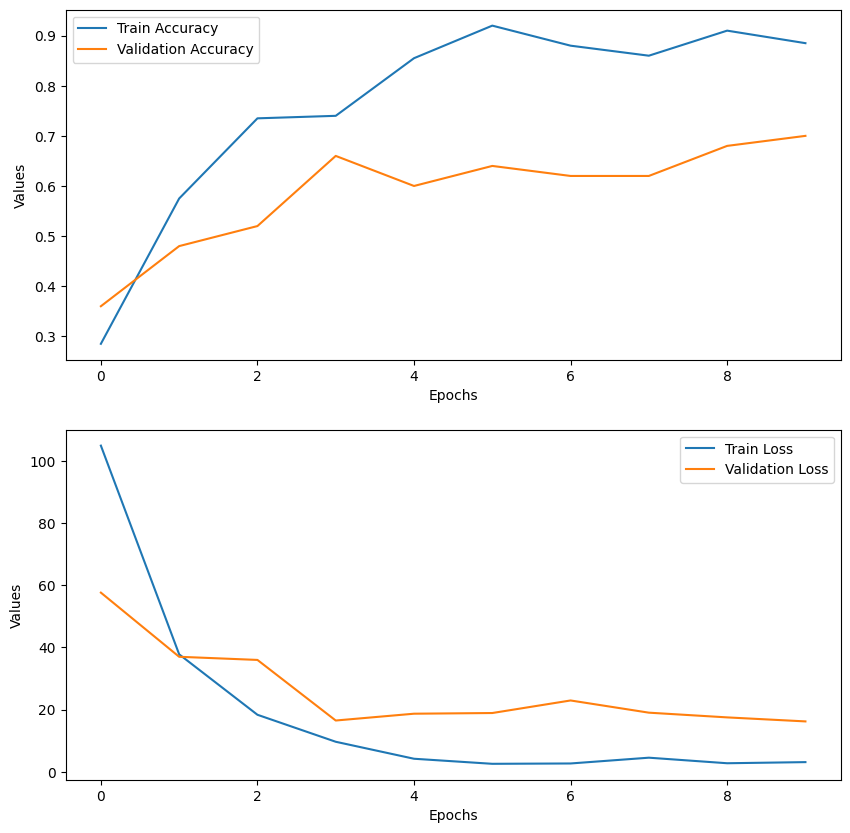

In [89]:
print_hist(get_model().fit(x_train, y_train, epochs=10, batch_size=16, validation_data=(x_test, y_test), verbose=0))

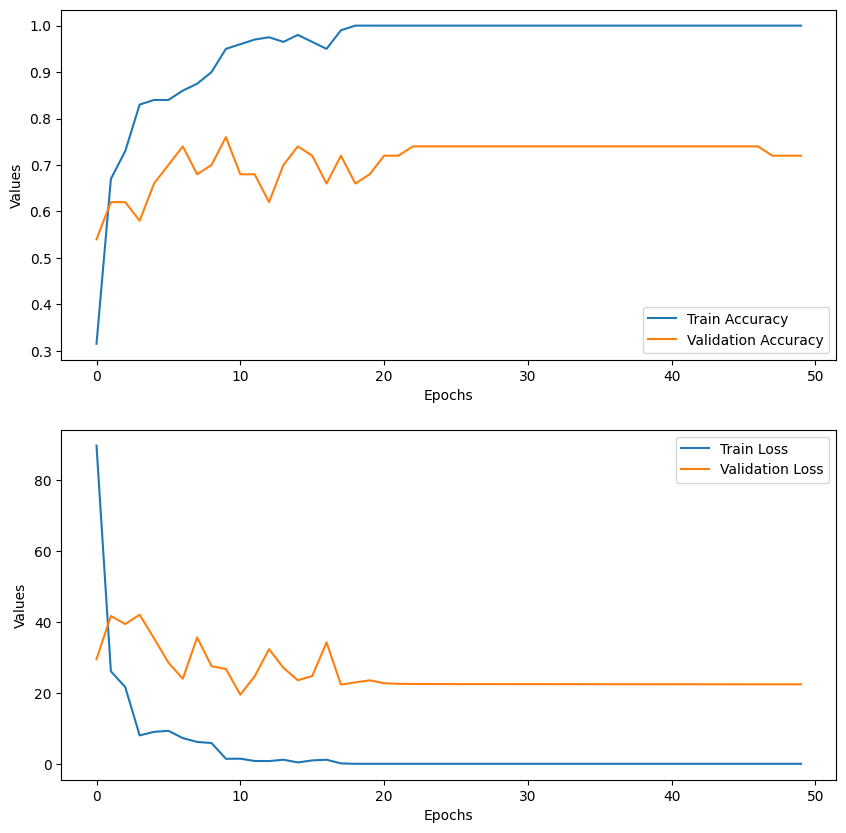

In [93]:
hist_simple = get_model(0.001).fit(x_train, y_train, epochs=50, batch_size=16, validation_data=(x_test, y_test), verbose=0)
print_hist(hist_simple)

# Влияние learning rate

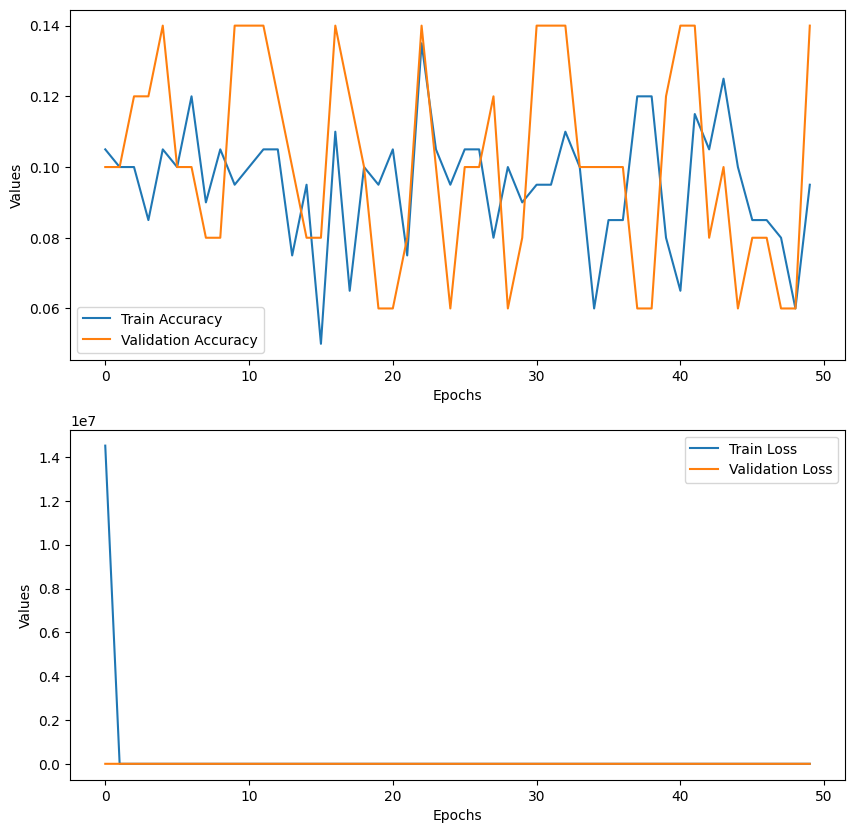

In [94]:
print_hist(get_model(10.0).fit(x_train, y_train, epochs=50, batch_size=16, validation_data=(x_test, y_test), verbose=0))

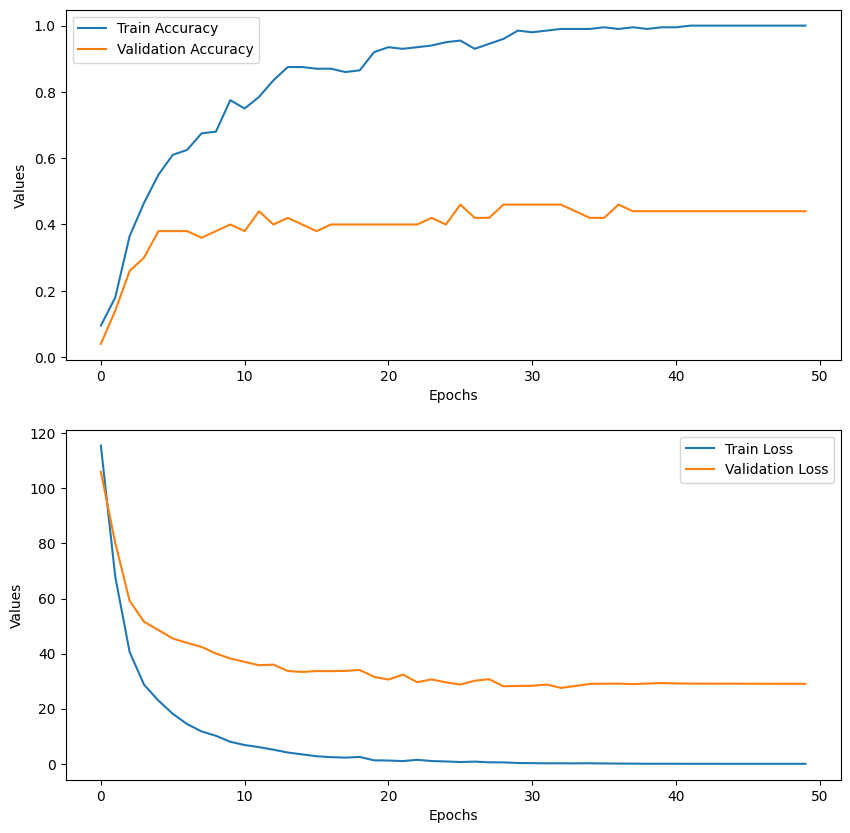

In [84]:
print_hist(get_model(0.0001).fit(x_train, y_train, epochs=50, batch_size=16, validation_data=(x_test, y_test), verbose=0))

# Влияние dropout

In [99]:
def get_model_dropout(learning_rate=0.001, p=0.05):
    model = Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dropout(p),
        layers.Dense(100, activation='relu'),
        layers.Dropout(p),
        layers.Dense(10, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

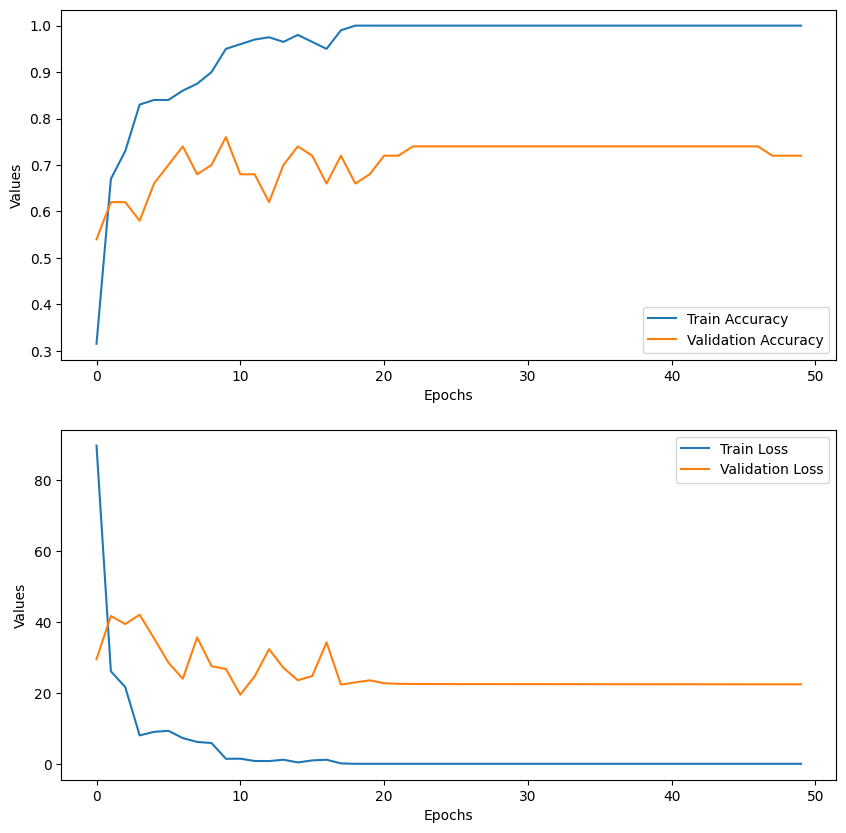

In [104]:
print_hist(hist_simple)

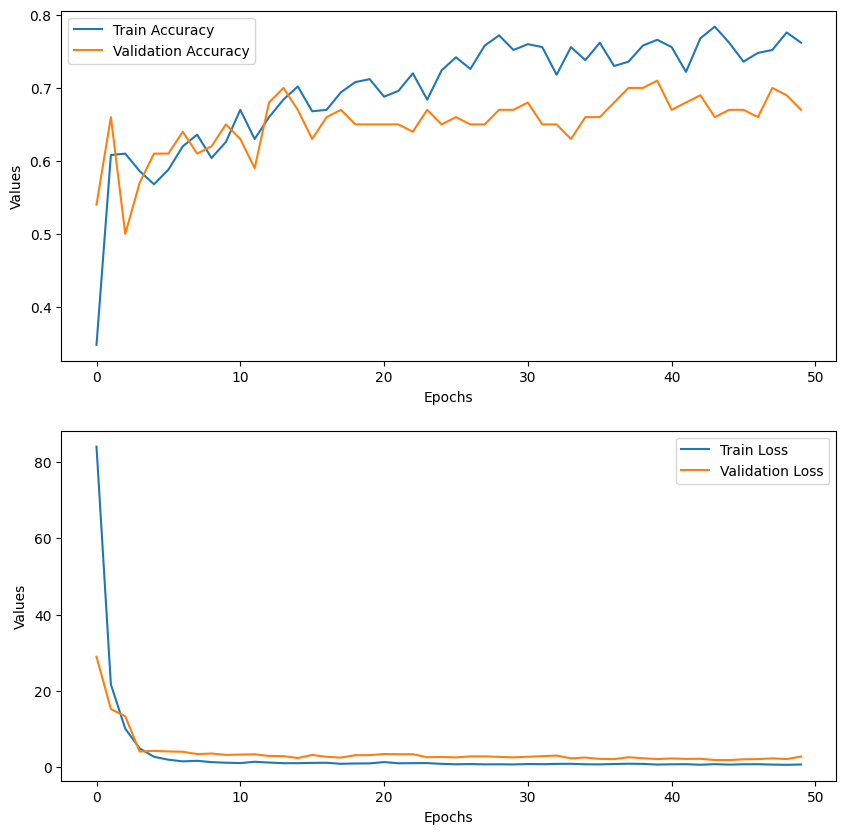

In [111]:
print_hist(get_model_dropout().fit(x_train, y_train, epochs=50, batch_size=16, validation_data=(x_test, y_test), verbose=0))

# Влияние batch normalization

In [90]:
def get_model_batch_norm(learning_rate=0.001):
    model = Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.BatchNormalization(),
        layers.Dense(100, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

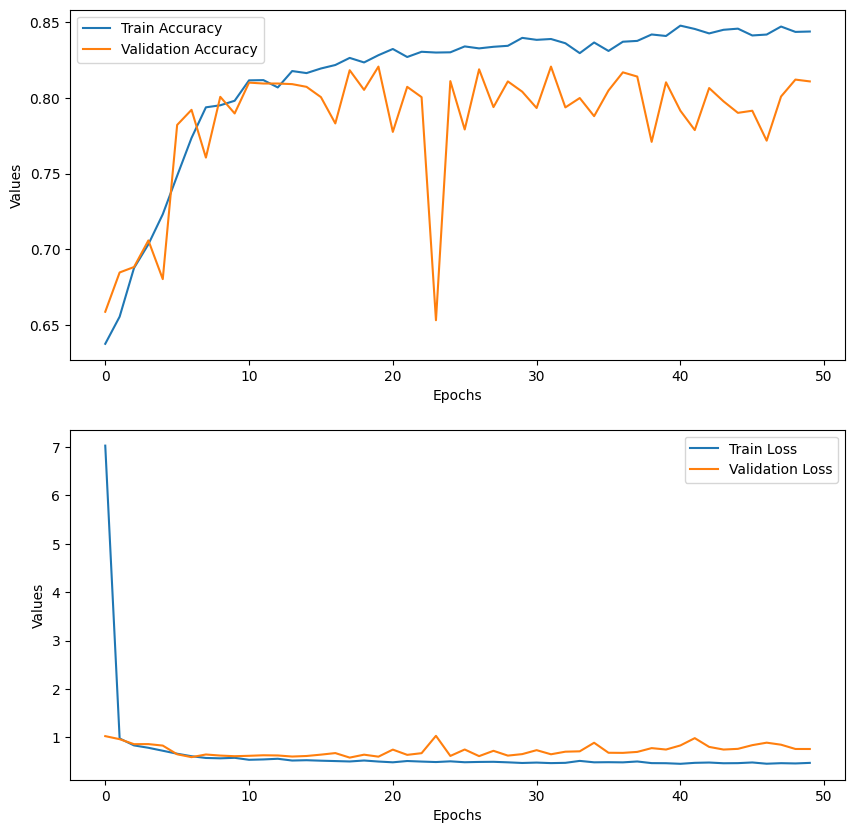

In [122]:
print_hist(get_model(0.001).fit(x_train, y_train, epochs=50, batch_size=16, validation_data=(x_test, y_test), verbose=0))

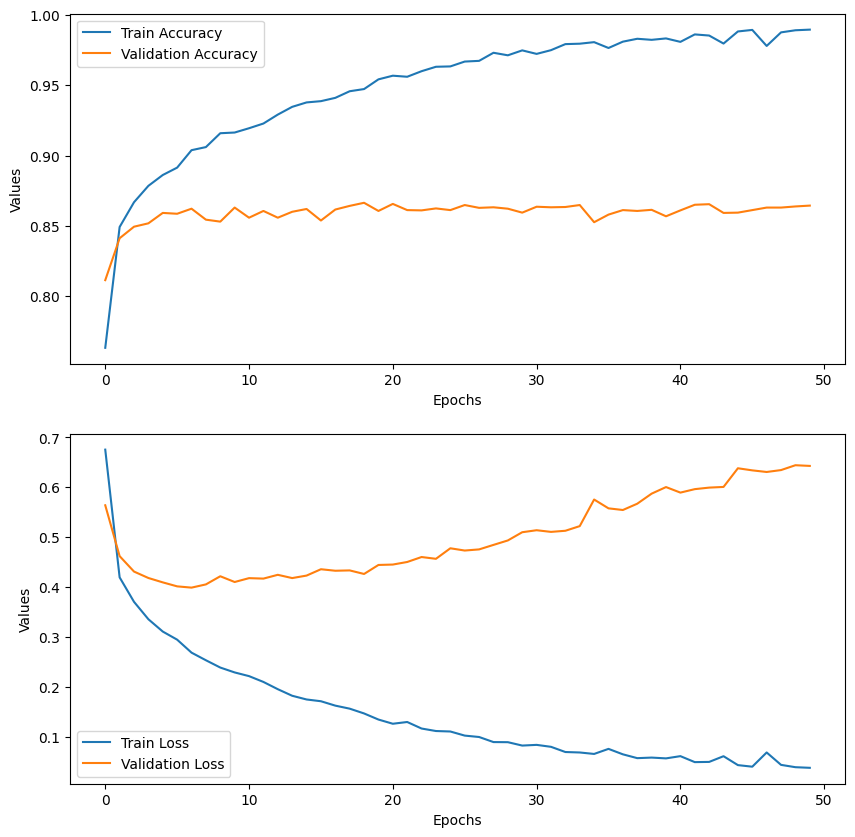

In [123]:
print_hist(get_model_batch_norm().fit(x_train, y_train, epochs=50, batch_size=256, validation_data=(x_test, y_test), verbose=0))